# Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in and viewing Datasets

In [2]:
training = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
training

training.describe()
training.isna().any()
training[training.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Null Values and Data Cleaning

In [3]:
#np.median(training["Age"])
na_median = training["Age"].median()
training["Age"] = training["Age"].fillna(na_median)
#temp_data.isna().any()
training["Age"].isna().any()

False

In [4]:
training["Cabin"].value_counts()
training["Cabin"] = training["Cabin"].fillna("No Cabin Info")
training["Cabin"].isna().any()

False

In [5]:
training["Embarked"].value_counts()
training["Embarked"] = training["Embarked"].fillna("No Port Info")
training["Embarked"].isna().any()

False

# Exploratory Data Analysis


<Axes: xlabel='Sex', ylabel='Fare'>

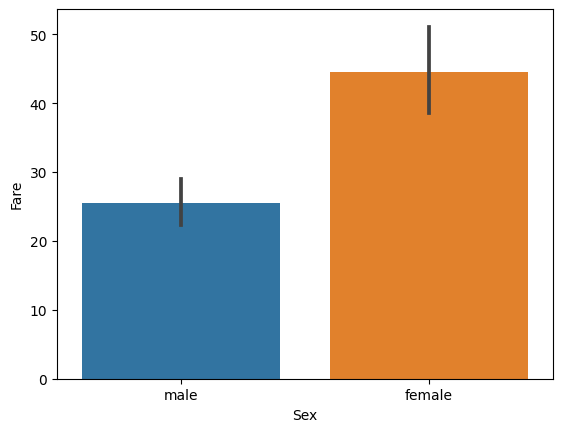

In [6]:
sns.barplot(x = 'Sex', y = 'Fare', data = training)
